(1797, 64)
(1797,)


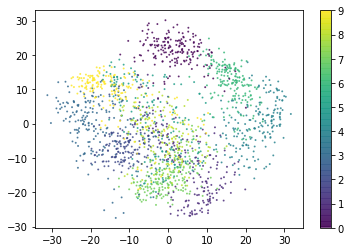

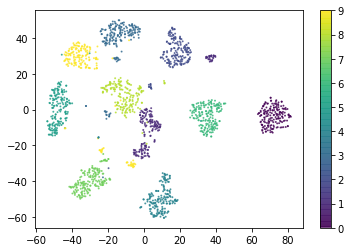

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

digits = datasets.load_digits()

print(digits.data.shape)

print(digits.target.shape)

X_reduced_pca = PCA(n_components=2).fit_transform(digits.data)
X_reduced_tsne = TSNE(n_components=2, random_state=0).fit_transform(digits.data)


plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], s=1, alpha=0.7, c=digits.target)
plt.colorbar()
plt.show()

plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], s=1, alpha=0.7, c=digits.target)
plt.colorbar()
plt.show()

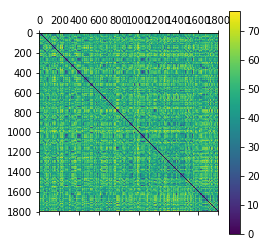

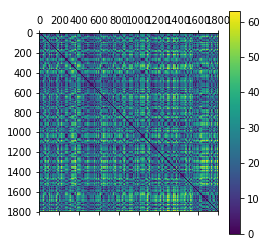

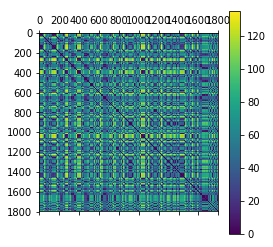

In [11]:
from scipy.spatial import distance

distance_raw = distance.cdist(digits.data, digits.data, metric='euclidean')
distance_pca = distance.cdist(X_reduced_pca, X_reduced_pca, metric='euclidean')
distance_tsne = distance.cdist(X_reduced_tsne, X_reduced_tsne, metric='euclidean')

plt.matshow(distance_raw)
plt.colorbar()
plt.show()

plt.matshow(distance_pca)
plt.colorbar()
plt.show()

plt.matshow(distance_tsne)
plt.colorbar()
plt.show()

pca


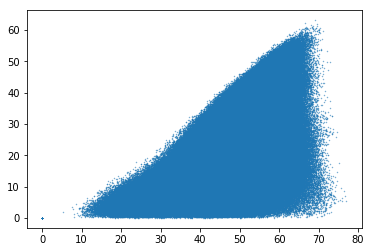

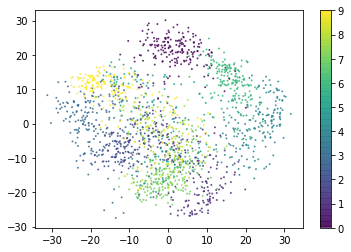

tsne


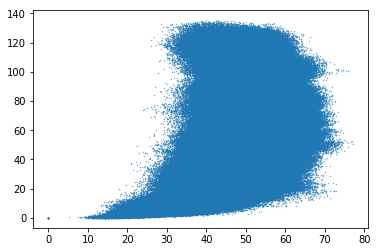

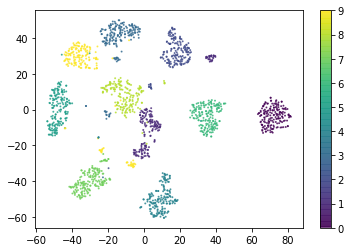

In [20]:
# raw-pca
print('pca')
plt.scatter(distance_raw.flatten(), distance_pca.flatten(),  s=0.1, alpha=0.5)
plt.show()
plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], s=1, alpha=0.7,  c=digits.target)
plt.colorbar()
plt.show()

# raw-tsne
print('tsne')
plt.scatter(distance_raw.flatten(), distance_tsne.flatten(),  s=0.1, alpha=0.5,)
plt.show()
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], s=1, alpha=0.7, c=digits.target)
plt.colorbar()
plt.show()

pca


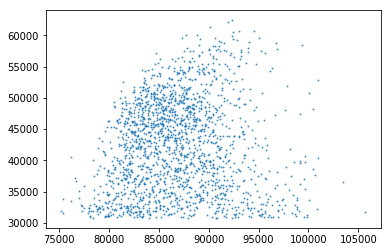

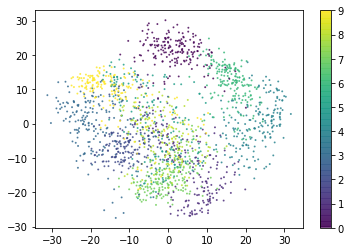

tsne


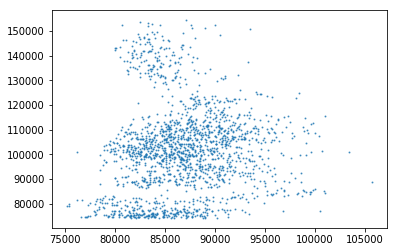

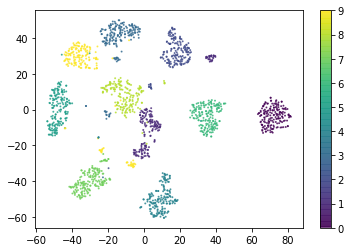

In [25]:
distance_raw.sum(axis=1).shape
# raw-pca
print('pca')
plt.scatter(distance_raw.sum(axis=1), distance_pca.sum(axis=1),  s=1, alpha=0.7)
plt.show()
plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], s=1, alpha=0.7,  c=digits.target)
plt.colorbar()
plt.show()

# raw-tsne
print('tsne')
plt.scatter(distance_raw.sum(axis=1), distance_tsne.sum(axis=1),  s=1, alpha=0.7,)
plt.show()
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], s=1, alpha=0.7, c=digits.target)
plt.colorbar()
plt.show()

In [31]:
# 外れ値検知
# (x, y) のlist から外れ値を検出し、異常scoreのリスト

def outlier(X):
    """
    X: (# item, 2)
    """
    ux = X.mean(axis=0)[0]
    uy = X.mean(axis=0)[1]
    X_mean0 = X-np.array([ux, uy])
    sigma = np.dot(X_mean0.T, X_mean0)/X.shape[0]
    sigma_inv = np.linalg.inv(sigma)
    scores = np.diag(np.dot(np.dot(X_mean0, sigma_inv), X_mean0.T))
    return scores
    
outlier_scores_raw_pca = outlier(np.array([distance_raw.sum(axis=1), distance_pca.sum(axis=1)]).T)

outlier_scores_raw_tsne = outlier(np.array([distance_raw.sum(axis=1), distance_tsne.sum(axis=1)]).T)

pca


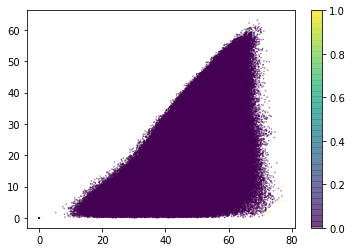

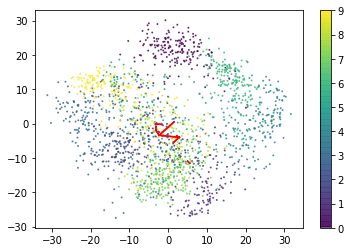

tsne


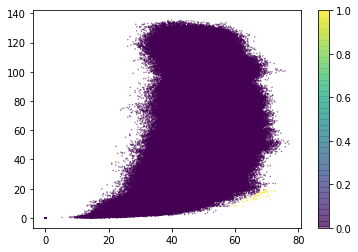

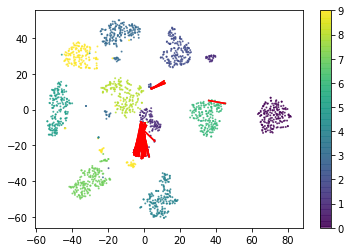

In [57]:
print('pca')
outlier_raw_pca = np.abs(distance_raw-distance_pca) > 70
plt.scatter(distance_raw.flatten(), distance_pca.flatten(),  s=0.1, alpha=0.5, c=outlier_raw_pca.flatten())
plt.colorbar()
plt.show()

plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], s=1, alpha=0.7,  c=digits.target)
plt.colorbar()
for idx in np.array(np.where(outlier_raw_pca)).T:
    plt.plot(X_reduced_pca[idx,0], X_reduced_pca[idx, 1], c='r')
plt.show()

# raw-tsne
print('tsne')
# outlier_raw_tsne = outlier_scores_raw_tsne>5
outlier_raw_tsne = (distance_raw-distance_tsne) > 50

plt.scatter(distance_raw.flatten(), distance_tsne.flatten(),  s=0.1, alpha=0.5, c=outlier_raw_tsne.flatten())
plt.colorbar()
plt.show()

plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], s=1, alpha=0.7,  c=digits.target)
plt.colorbar()
for idx in np.array(np.where(outlier_raw_tsne)).T:
    plt.plot(X_reduced_tsne[idx,0], X_reduced_tsne[idx, 1], c='r')
plt.show()


pca


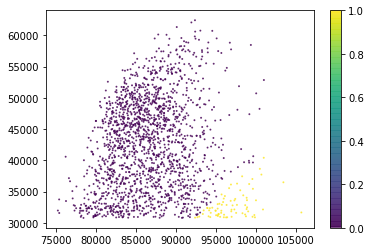

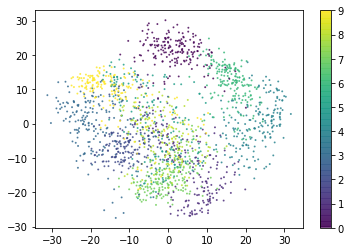

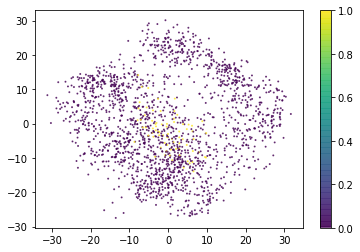

tsne


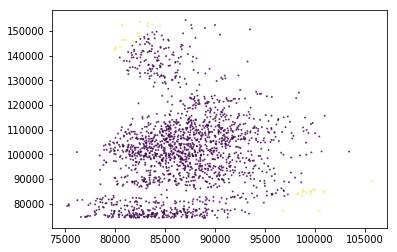

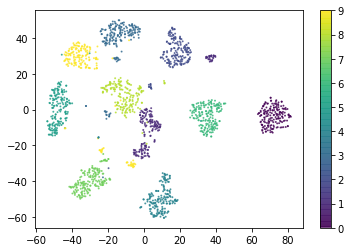

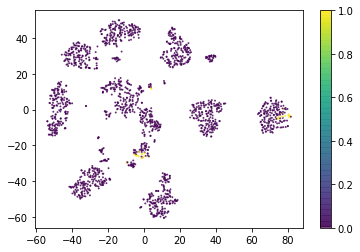

In [47]:
print('pca')
# outlier_raw_pca = outlier_scores_raw_pca>5
outlier_raw_pca = np.abs(distance_raw.sum(axis=1)*(1.2)-60000-distance_pca.sum(axis=1)) > 20000

plt.scatter(distance_raw.sum(axis=1), distance_pca.sum(axis=1),  s=1, alpha=0.7, c=outlier_raw_pca)
plt.colorbar()
plt.show()

plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], s=1, alpha=0.7,  c=digits.target)
plt.colorbar()
plt.show()

plt.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], s=1, alpha=0.7,  c=outlier_raw_pca)
plt.colorbar()
plt.show()

# raw-tsne
print('tsne')
# outlier_raw_tsne = outlier_scores_raw_tsne>5
outlier_raw_tsne = np.abs(distance_raw.sum(axis=1)*(7/3)-95000-distance_tsne.sum(axis=1)) > 50000

plt.scatter(distance_raw.sum(axis=1), distance_tsne.sum(axis=1),  s=1, alpha=0.7, c=outlier_raw_tsne)
plt.show()

plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], s=1, alpha=0.7, c=digits.target)
plt.colorbar()
plt.show()

plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], s=1, alpha=0.7, c=outlier_raw_tsne)
plt.colorbar()
plt.show()